In [ ]:
!ls data

# Chapter 5 Resampling Methods 重采样方法
+ **Resampling** - repeatedly drawing samples from a training set and refitting a modelon each sample - to obtain additional info.

+ Common resampling methods: bootstraping and cross validation.
+ Cross validation can be used to estimate the test error to evaluate model perfomance (**model assessment**) or to select appropriate level of flexibility (**model selection**).
+ Boostraping provide a measure of accuracy of a parameter estimates or statistical learning method.

+ **重新采样** - 反复从训练集中抽取样本并在每个样本上重新拟合模型 - 以获取更多信息。

+ 常见的重新采样方法：引导和交叉验证。
+ 交叉验证可用于估计测试误差以评估模型性能（**模型评估**）或选择适当的灵活性水平（**模型选择**）。
+ 引导提供参数估计或统计学习方法的准确性度量。

## Cross Validation 交叉验证
### Validation Set Approach 验证集方法
+ Usually a test set is not available so a simple strategy to create one is to split the available data into training and testing (**validation or hold-out set**).
+ Divide the data into half where the observation in each sets are randomly selected.
+ To assess the model perfomance - quantitative responses usually use MSE, for categorical can use error rate, area under the curve, F1 score, weighting of confusion matrix, etc...
+ Drawbacks of this technique:
    + the validation estimation of the test error rate can be highly variable.
    + the validation set error rate may tend to overestimate the test error rate.

+ 通常测试集不可用，因此创建测试集的一个简单策略是将可用数据分为训练和测试（验证集或保留集）。

+ 将数据分为两半，每组中的观察结果都是随机选择的。

+ 为了评估模型性能 - 定量响应通常使用 MSE，对于分类可以使用错误率、曲线下面积、F1 分数、混淆矩阵权重等...

+ 该技术的缺点：
    + 测试错误率的验证估计可能变化很大。
    + 验证集错误率可能会高估测试错误率。



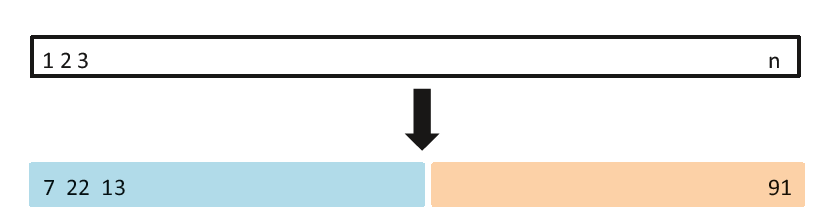

In [ ]:
from IPython.display import Image
Image('images/pw41.png', width =500)

#### Example


In [ ]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
%matplotlib inline


In this section, we'll explore the use of the validation set approach in order to estimate the
test error rates that result from fitting various linear models on the ${\tt Auto}$ data set.

在本节中，我们将探讨验证集方法的使用，以估计在自动数据集上拟合各种线性模型所产生的测试错误率。

In [ ]:
df1 = pd.read_csv('/content/auto.csv', na_values='?').dropna()
#将问号 '?' 视为缺失值进行处理，并且使用 dropna() 方法删除包含缺失值的行
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


We begin by using the ${\tt sample()}$ function to split the set of observations
into two halves, by selecting a random subset of 196 observations out of
the original 392 observations. We refer to these observations as the training
set.

We'll use the ${\tt random\_state}$ parameter in order to set a seed for
${\tt python}$’s random number generator, so that you'll obtain precisely the same results each time. It is generally a good idea to set a random seed when performing an analysis such as cross-validation
that contains an element of randomness, so that the results obtained can be reproduced precisely at a later time.

我们首先使用sample()函数将观测值集分成两半，从原始392个观测值中选择196个观测值的随机子集。我们将这些观察结果称为训练集。

我们将使用 random_state 参数来为 python 的随机数生成器设置种子，以便您每次都会获得完全相同的结果。在执行包含随机性元素的交叉验证等分析时，设置随机种子通常是一个好主意，以便稍后可以精确地重现获得的结果。

In [ ]:
train_df = df1.sample(196, random_state = 1)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

We then use ${\tt LinearRegression()}$ to fit a linear regression to predict ${\tt mpg}$ from ${\tt horsepower}$ using only
the observations corresponding to the training set.

然后，我们使用 LinearRegression() 拟合线性回归，仅使用与训练集相对应的观察结果来预测马力的英里数。

In [ ]:
#skl_lm.LinearRegression() 来创建一个线性回归模型对象 lm
lm = skl_lm.LinearRegression()
#fit() 方法将训练集的特征 (X_train) 和标签 (y_train) 拟合到模型中，以训练模型
model = lm.fit(X_train, y_train)

We now use the ${\tt predict()}$ function to estimate the response for the test
observations, and we use ${\tt sklearn}$ to caclulate the MSE.

我们现在使用 Predict() 函数来估计测试观察的响应，并使用 sklearn 来计算 MSE。

In [ ]:
#model 对测试集的特征 X_test 进行预测，得到预测值 pred
pred = model.predict(X_test)
#用于计算均方误差（Mean Squared Error，MSE）
from sklearn.metrics import mean_squared_error
#mean_squared_error 函数计算了预测值 pred 和测试集标签 y_test 之间的均方误差
MSE = mean_squared_error(y_test, pred)
print(MSE)

23.361902892587224


Therefore, the estimated test MSE for the linear regression fit is 23.36. We
can use the ${\tt PolynomialFeatures()}$ function to estimate the test error for the polynomial
and cubic regressions.

因此，线性回归拟合的估计测试 MSE 为 23.36。我们可以使用 PolynomialFeatures() 函数来估计多项式和三次回归的测试误差。

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#对训练集的特征 X_train 和测试集的特征 X_test 进行了多项式扩展，分别生成了二次多项式特征 X_train2 和 X_test2，以及三次多项式特征 X_train3 和 X_test3
#分别使用二次多项式特征和三次多项式特征训练了线性回归模型，并计算了它们在测试集上的均方误差
#打印输出了二次多项式回归模型和三次多项式回归模型在测试集上的均方误差

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

20.252690858345748
20.325609365972525


These error rates are 20.25 and 20.33, respectively. If we choose a different
training set instead, then we will obtain somewhat different errors on the
validation set. We can test this out by setting a different random seed:

这些错误率分别为 20.25 和 20.33。如果我们选择不同的训练集，那么我们将在验证集上获得一些不同的错误。我们可以通过设置不同的随机种子来测试这一点

In [ ]:
##Choose a different training set
#这段代码与前面的代码类似，但是使用了不同的随机种子生成了另一个训练集，并对其进行了相同的操作

train_df = df1.sample(196, random_state = 2)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

# Linear 线性
model = lm.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))

# Quadratic 二次函数
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic 立方体
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

25.10853905288967
19.722533470492422
19.92136786007267


These results are consistent with our previous findings: a model that
predicts ${\tt mpg}$ using a quadratic function of ${\tt horsepower}$ performs better than
a model that involves only a linear function of ${\tt horsepower}$, and there is
little evidence in favor of a model that uses a cubic function of ${\tt horsepower}$.

这些结果与我们之前的发现一致：使用 ${\tt horsepower}$ 的二次函数预测 ${\tt mpg}$ 的模型比仅涉及 ${\tt horsepower}$ 的线性函数的模型表现更好，并且几乎没有证据支持使用 ${\tt horsepower}$ 的三次函数的模型。

### Leave One Out Cross Validation 留一交叉验证
+ LOOCV has only one observation in the test set and uses all other n-1 observations to build a model.
+ n different models are built leaving out each observation once and error is averaged over these n trials.

+ LOOCV 测试集中只有一个观测值，并使用所有其他 n-1 个观测值来构建模型。

+ 建立了 n 个不同的模型，将每个观察值忽略一次，并对这 n 个试验的误差进行平均。

$$\textrm{CV}_{(n)} = \frac{1}{n}\sum_{i=1}^n{\textrm{MSE}_i}$$
+ LOOCV is better than validation set approach. It has far less bias and tends to not overestimate the test error rate.
+ Model is built on nearly all the data and there is no randomness in the splits since each observation will be left out once.
+ It is computationally expensive especially with large n and a complex model.

+ LOOCV 比验证集方法更好。它的偏差要小得多，并且往往不会高估测试错误率。

+ 模型几乎是基于所有数据构建的，并且分割不存在随机性，因为每个观察都会被忽略一次。

+ 它的计算成本很高，尤其是对于较大的 n 和复杂的模型。


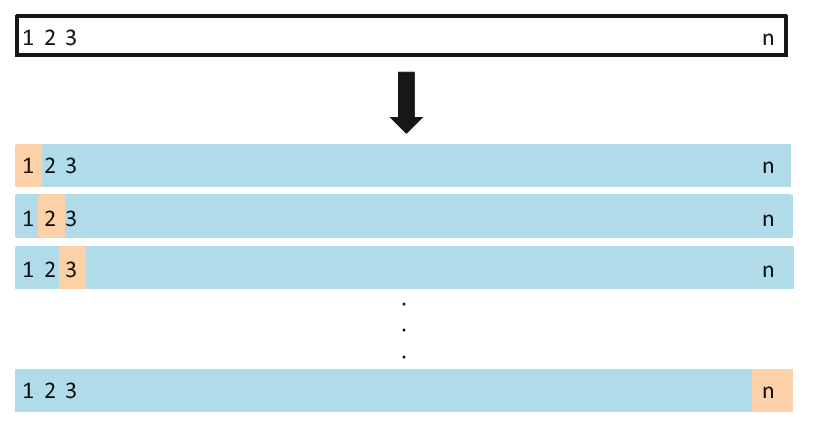

In [ ]:
Image('images/pw42.png', width =500)

#### Example

In [ ]:
model = lm.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score, LeaveOneOut
loo = LeaveOneOut()
X = df1['horsepower'].values.reshape(-1,1)
y = df1['mpg'].values.reshape(-1,1)
loo.get_n_splits(X)

from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Folds: 392, MSE: 24.231513517929226, STD: 36.79731503640535


We can repeat this procedure for increasingly complex polynomial fits.

To automate the process, we use the for() function to initiate a for loop which iteratively fits polynomial regressions for polynomials of order i = 1 to i = 5 and computes the associated cross-validation error.

我们可以对日益复杂的多项式拟合重复此过程。

为了使该过程自动化，我们使用 for() 函数启动一个 for 循环，该循环迭代地拟合阶数 i = 1 到 i = 5 的多项式的多项式回归，并计算相关的交叉验证误差。

In [ ]:
#这段代码使用了循环来训练不同阶数的多项式回归模型，并使用交叉验证计算了每个模型的均方误差（MSE）以及标准差
#循环遍历阶数从 1 到 5，对于每个阶数，使用 PolynomialFeatures 类来生成相应阶数的多项式特征，并将特征矩阵 X_current 赋值为这些多项式特征
#使用 LinearRegression 类来训练线性回归模型 model，并在训练集上进行交叉验证计算均方误差，打印输出每个阶数的多项式回归模型的均方误差以及标准差
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Degree-1 polynomial MSE: 24.231513517929226, STD: 36.797315036405344
Degree-2 polynomial MSE: 19.248213124489737, STD: 34.99844615178235
Degree-3 polynomial MSE: 19.334984064092605, STD: 35.76513567783445
Degree-4 polynomial MSE: 19.424430307079565, STD: 35.683352752283625
Degree-5 polynomial MSE: 19.033202845369832, STD: 35.31730256892403



### k-fold cross validation k折交叉验证
+ Similar to LOOCV but this time you leave some number greater than 1 out.
+ Here, $k$ is the number of partitions of your sample, so if you have $n=1000$ observations and k = 10, the each fold will be 100.
+ 900 observations would be the training set and 100 observations would act as your test set.
+ Get an MSE for each fold of these 100 observations and take the average.
$$\textrm{CV}_{(k)} = \frac{1}{k}\sum_{i=1}^k{\textrm{MSE}_i}$$
+ LOOCV is a special case of k-fold CV whenever $k=n$.
+ Computationally inexpensive compare to LOOCV.
+ Some variability compare to LOOCV.

+ 与 LOOCV 类似，但这次你省略了一些大于 1 的数字。
+ 此处，$k$ 是样本的分区数，因此如果你有 $n=1000$ 个观测值，并且 k = 10，则每个折叠将为 100。
+ 900 个观测值将是训练集，100 个观测值将作为你的测试集。
+ 为这 100 个观测值的每个折叠获取 MSE 并取平均值。
$$\textrm{CV}_{(k)} = \frac{1}{k}\sum_{i=1}^k{\textrm{MSE}_i}$$
+ 当 $k=n$ 时，LOOCV 是 k 折叠 CV 的一个特例。
+ 与 LOOCV 相比，计算成本低廉。
+ 与 LOOCV 相比，存在一些可变性。



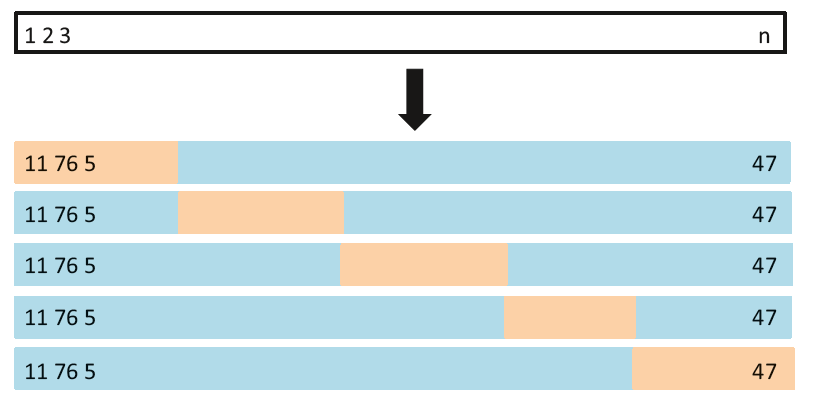

In [ ]:
Image('images/pw43.png', width =500)

#### Example

In [ ]:
#这段代码进行了与前一个类似的操作，但使用了更多的交叉验证折数（n_splits=10），这意味着数据集会被分成更多的子集用于交叉验证。每个子集都会轮流作为测试集，从而更好地评估模型的性能
#导入了 KFold 类用于交叉验证
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=True)#循环遍历阶数从 1 到 10
#对于每个阶数，使用 PolynomialFeatures 类来生成相应阶数的多项式特征，并将特征矩阵 X_current 赋值为这些多项式特征
#使用交叉验证（10折）计算模型在训练集上的均方误差，其中 scoring="neg_mean_squared_error" 表示使用负均方误差作为评价指标
#打印输出每个阶数的多项式回归模型的均方误差以及标准差
for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
#结果显示了不同阶数的多项式回归模型的均方误差和标准差
#阶数为1时，模型的均方误差为24.10，随着阶数的增加，模型的均方误差逐渐减小，直到阶数为6时达到最小值（18.64）
#随后，随着阶数的进一步增加，模型的均方误差开始略微上升，但整体变化不大
#在这个案例中，阶数为6的多项式回归模型具有最小的均方误差，可能是最合适的模型选择

Degree-1 polynomial MSE: 24.097675731883065, STD: 4.818054666704996
Degree-2 polynomial MSE: 19.178889864889662, STD: 5.12639344651731
Degree-3 polynomial MSE: 19.21385952372538, STD: 5.143687485486234
Degree-4 polynomial MSE: 19.212807019336708, STD: 4.926661027590547
Degree-5 polynomial MSE: 18.75798060871547, STD: 4.703233523050325
Degree-6 polynomial MSE: 18.639821824201313, STD: 4.508891213845055
Degree-7 polynomial MSE: 18.82077911828793, STD: 4.565331800165851
Degree-8 polynomial MSE: 18.975737051377088, STD: 4.7117232747972935
Degree-9 polynomial MSE: 18.937506971678495, STD: 4.8696787024468895
Degree-10 polynomial MSE: 18.79087319112218, STD: 4.841422782703906


### bias-variance tradeoff between LOOCV and k-folds
### LOOCV 和 k 倍之间的偏差-方差权衡
+ Since LOOCV trains on nearly all the data, the test error rate will generally be lower than k-fold and therefore less biased.
+ LOOCV will have higher variance since all $n$ models will be very highly correlated to one another.
+ Since the models won't differ much, the test error rate (which what CV is measuring) will vary more than k-fold which has fewer models that are less correlated with one another.
+ A value of $k$ between 5 and 10 is a good rule of thumb that balances the trade-off between bias and variance

+ 由于 LOOCV 几乎在所有数据上进行训练，因此测试错误率通常会低于 k 倍，因此偏差较小。

+ LOOCV 将具有更高的方差，因为所有 n 个模型都将彼此高度相关。

+ 由于模型不会有太大差异，因此测试错误率（CV 所测量的）将变化超过 k 倍，其中模型较少，彼此之间的相关性较低。

+ k 值在 5 到 10 之间是一个很好的经验法则，可以平衡偏差和方差之间的权衡

#### Example: Default Data

In [ ]:
df2 = pd.read_csv('/content/default.csv', na_values='?').dropna()
df2.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [ ]:
df2.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


First we'll try just holding out a random 20% of the data:

首先，我们将尝试仅保留随机 20% 的数据：

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

for i in range(1,11):
    train_df2 = df2.sample(8000, random_state = i)
    test_df2 = df2[~df2.isin(train_df2)].dropna(how = 'all')

    # Fit a logistic regression to predict default using balance
    #使用smf.glm()函数拟合一个逻辑回归模型，将default作为因变量，balance作为自变量，并指定family=sm.families.Binomial()来进行二分类逻辑回归
    model = smf.glm('default~balance', data=train_df2, family=sm.families.Binomial())
    result = model.fit()
    predictions_nominal = [ "Yes" if x < 0.5 else "No" for x in result.predict(test_df2)]#根据模型预测测试集数据，并将概率转换为类别（"Yes"或"No"）
    print("----------------")
    print("Random Seed = " + str(i) + "")
    print("----------------")
    print(confusion_matrix(test_df2["default"],
                       predictions_nominal))
    print(classification_report(test_df2["default"],
                            predictions_nominal,
                            digits = 3))
    print()
#这段代码执行了逻辑回归模型的训练和评估，其中包括了使用不同的随机种子（random seed）进行模型训练和评估，并打印了混淆矩阵和分类报告
#对于每个随机种子，打印以下内容：
#随机种子的值。
#对应测试集的混淆矩阵。
#对应测试集的分类报告，包括精确度、召回率、F1值和支持度

----------------
Random Seed = 1
----------------
[[1921    6]
 [  50   23]]
              precision    recall  f1-score   support

          No      0.975     0.997     0.986      1927
         Yes      0.793     0.315     0.451        73

    accuracy                          0.972      2000
   macro avg      0.884     0.656     0.718      2000
weighted avg      0.968     0.972     0.966      2000


----------------
Random Seed = 2
----------------
[[1919   13]
 [  47   21]]
              precision    recall  f1-score   support

          No      0.976     0.993     0.985      1932
         Yes      0.618     0.309     0.412        68

    accuracy                          0.970      2000
   macro avg      0.797     0.651     0.698      2000
weighted avg      0.964     0.970     0.965      2000


----------------
Random Seed = 3
----------------
[[1918   14]
 [  49   19]]
              precision    recall  f1-score   support

          No      0.975     0.993     0.984      1932
    

### Precision Score 精度分数
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
TP – True Positives
FP – False Positives

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

准确率直观地表示分类器不将负样本标记为正样本的能力。
TP – 真阳性
FP – 假阳性

准确率 – 阳性预测的准确度。
准确率 = TP/(TP + FP)

### Recall Score 召回率
The recall is intuitively the ability of the classifier to find all the positive samples.
FN – False Negatives

Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.
Recall = TP/(TP+FN)

召回率直观地表示分类器找到所有正样本的能力。
FN – 假阴性

召回率（又称敏感度或真阳性率）：正确识别的阳性比例。
召回率 = TP/(TP+FN)

### F1 Score 精确度和召回率的加权调和平均值
F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.

F1 = 2 x (precision x recall)/(precision + recall)

The F1 score reaches its best value at 1 and worst score at 0.

The F1 score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

F1 分数（又称 F 分数或 F 度量）——用于比较两个分类器的有用指标。F1 分数考虑了精确度和召回率。它是通过找到精确度和召回率的调和平均值来创建的。

F1 = 2 x（精确度 x 召回率）/（精确度 + 召回率）

F1 分数在 1 时达到最佳值，在 0 时达到最差值。

F1 分数将召回率的权重比精确度高出一个倍数 beta。beta == 1.0 表示召回率和精确度同等重要。

### Support 支持度：测试集中实际样本的数量
The support is the number of occurrences of each class in y_true.

支持度是 y_true 中每个类出现的次数。



# Exercise

Build a logistic model on the full Default dataset and then run 5-fold cross-validation to get a more accurate estimate of your test error rate:

在完整的默认数据集上构建一个逻辑模型，然后运行 ​​5 倍交叉验证以更准确地估计测试错误率：

In [ ]:
?np.ones


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn import metrics

df2 = pd.read_csv('data/default.csv', na_values='?').dropna()

df2['Yes'] = (df2['default'] == 'Yes').astype(int)

X = np.column_stack((np.ones(len(df2)), df2['balance']))
y=df2['Yes'].values

lr=LogisticRegression()
predicted = cross_val_predict(lr, X, y, cv=5)
print(metrics.accuracy_score(y, predicted))
print(confusion_matrix(y,predicted))
print(metrics.classification_report(y, predicted))

# Bootstrap 引导
+ Can be used to quantify the uncertainty associated with a given estimator or statistical learning method.
+ Bootstrap approach allows us to use a computer to emulate the process of obtaining new sample sets, to estimate the variability of estimated parameter without generating additional samples.
+ Rather than repeatedly obtaining independent data sets from the population, we instead obtain distinct data sets by repeatedly sampling observations from the original data set.
+ We randomly select $n$ observations from the data set in order to produce a bootstrap data set.
+ The sampling is performed with replacement, which means that the same observation can occur more than once in the bootstrap data set.


+ 可用于量化与给定估计量或统计学习方法相关的不确定性。
+ 引导方法允许我们使用计算机模拟获取新样本集的过程，以估计估计参数的变异性，而无需生成额外的样本。
+ 我们不是从总体中重复获取独立的数据集，而是通过从原始数据集中重复抽样观察来获取不同的数据集。
+ 我们从数据集中随机选择 $n$ 个观察值以生成引导数据集。
+ 抽样是替换进行的，这意味着相同的观察值可以在引导数据集中出现多次。



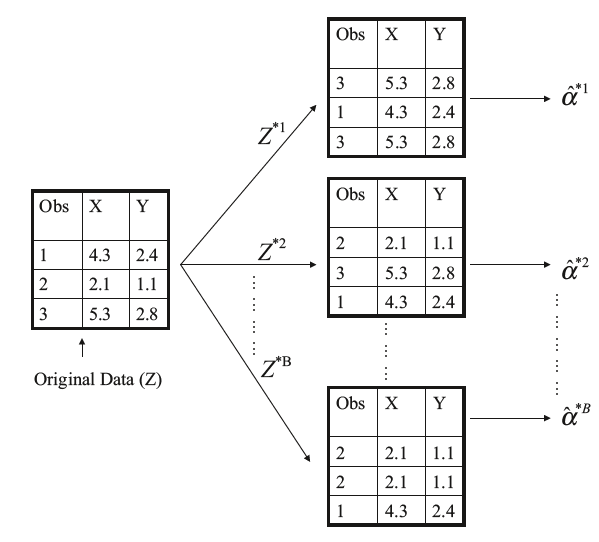

In [ ]:
Image('images/pw44.png', width =500)

#### Example:
+ Suppose that we wish to invest a fixed sum of money in two financial assets that yield returns of $X$ and $Y$ , respectively, where $X$ and $Y$ are random quantities.
+ We will invest a fraction $\alpha$ of our money in $X$, and the remaining $1 − \alpha$ in $Y$.
+ Since there is variability associated with the returns on these two assets, we wish to choose $\alpha$ to minimize the total risk, or variance, of our investment.
$$\hat{\alpha} = \frac{\hat{\sigma}^2_Y - \hat{\sigma}_{XY}}{\hat{\sigma}^2_X + \hat{\sigma}^2_Y - 2\hat{\sigma}_{XY}}$$
+ 100 pairs of returns for the investments $X$ and $Y$ are simulated, to estimate $\hat{\sigma}^2_X, \hat{\sigma}^2_Y$ and $\hat{\sigma}_{XY}$, to obtain $\hat{\alpha}$.
+ This process is repeated 1000 times, resulting 1000 estimates for $\alpha$.
+ $0.532 \leq \hat{\alpha} \leq 0.657$.
+ $\bar{\alpha} = 0.5996$ and $\textrm{SE}(\hat{\alpha}) = 0.083$.
+ However this cannot be applied, because for real data we cannot generate new samples from the original population.
+ By using bootstrap technique,we can resample the data repeatedly.
+ The bootstrap data set, $Z^{*i}$ can be used to produce the estimate for $\alpha$, given as $\hat{\alpha}^{*i}$.
+ The SE of this bootstrap estimates is
$$\textrm{SE}_B(\hat{\alpha}) = \sqrt{\frac{1}{B-1}\sum_{r=1}^B{\left( \hat{\alpha}^{*r} - \frac{1}{B} \sum_{r^\prime = 1}^B{\hat{\alpha}^{*r^\prime}}\right)^2}}$$



+ 假设我们希望将固定金额的资金投资于两项金融资产，这两项资产的收益分别为 $X$ 和 $Y$，其中 $X$ 和 $Y$ 是随机量。
+ 我们将把资金的一小部分 $\alpha$ 投资于 $X$，其余的 $1 − \alpha$ 投资于 $Y$。
+ 由于这两项资产的收益存在差异，我们希望选择 $\alpha$ 来最小化我们投资的总体风险或方差。
$$\hat{\alpha} = \frac{\hat{\sigma}^2_Y - \hat{\sigma}_{XY}}{\hat{\sigma}^2_X + \hat{\sigma}^2_Y - 2\hat{\sigma}_{XY}}$$
+ 模拟投资 $X$ 和 $Y$ 的 100 对回报，以估计 $\hat{\sigma}^2_X、\hat{\sigma}^2_Y$ 和 $\hat{\sigma}_{XY}$，从而获得 $\hat{\alpha}$。
+ 此过程重复 1000 次，得到 1000 个 $\alpha$ 估计值。
+ $0.532 \leq \hat{\alpha} \leq 0.657$。
+ $\bar{\alpha} = 0.5996$ 和 $\textrm{SE}(\hat{\alpha}) = 0.083$。
+ 但是这不适用，因为对于真实数据，我们无法从原始总体中生成新样本。
+ 通过使用引导技术，我们可以反复对数据进行重新采样。
+ 引导数据集 $Z^{*i}$ 可用于生成 $\alpha$ 的估计值，表示为 $\hat{\alpha}^{*i}$。
+ 此引导估计的 SE 为
$$\textrm{SE}_B(\hat{\alpha}) = \sqrt{\frac{1}{B-1}\sum_{r=1}^B{\left( \hat{\alpha}^{*r} - \frac{1}{B} \sum_{r^\prime = 1}^B{\hat{\alpha}^{*r^\prime}}\right)^2}}$$

#### Example

In [ ]:
portfolio_df = pd.read_csv('data/portfolio.csv')
portfolio_df.head()

,Unnamed: 0,X,Y
0,1,-0.895251,-0.234924
1,2,-1.562454,-0.885176
2,3,-0.417090,0.271888
3,4,1.044356,-0.734198
4,5,-0.315568,0.841983


To illustrate the use of the bootstrap on this data, we must first create
a function, `alpha()`, which takes as input the data and outputs the estimate for $\alpha$ (described in more detail on page 187).

为了说明引导法在此数据上的应用，我们必须首先创建一个函数 `alpha()`，该函数以数据为输入，输出 $\alpha$ 的估计值（第 187 页有更详细的描述）。

In [ ]:
def alpha(X,Y):
    return ((np.var(Y)-np.cov(X,Y))/(np.var(X)+np.var(Y)-2*np.cov(X,Y)))

This function returns, or outputs, an estimate for $\alpha$ based on applying
(5.7) to the observations indexed by the argument index. For instance, the
following command tells `python` to estimate $\alpha$ using all 100 observations.

此函数根据将(5.7) 应用于参数索引所索引的观测值，返回或输出 $\alpha$ 的估计值。例如，以下命令告诉 `python` 使用所有 100 个观测值来估计 $\alpha$。

In [ ]:
X = portfolio_df.X[0:100]
y = portfolio_df.Y[0:100]
print(alpha(X,y))

[[1.07270947 0.57665115]
 [0.57665115 0.06414064]]


The next command uses the `sample()` function to randomly select 100 observations
from the range 1 to 100, with replacement. This is equivalent
to constructing a new bootstrap data set and recomputing $\hat{\alpha}$ based on the
new data set.

下一个命令使用 `sample()` 函数从 1 到 100 的范围内随机选择 100 个观测值（有放回）。这相当于构建一个新的引导数据集并根据新数据集重新计算 $\hat{\alpha}$。

In [ ]:
dfsample = portfolio_df.sample(frac=1, replace=True)
X = dfsample.X[0:100]
y = dfsample.Y[0:100]
print(alpha(X,y))

[[ 0.94551351  0.41691444]
 [ 0.41691444 -0.05685389]]


**sklearn have deprecated bootstrap function because the ML community does not seen resampling as crucial or useful**

We can implement a bootstrap analysis by performing this command many
times, recording all of the corresponding estimates for $\alpha$, and computing the resulting standard deviation. Below we produce $1,000$ bootstrap estimates for $\alpha$:

**sklearn 已弃用 bootstrap 函数，因为 ML 社区并不认为重采样至关重要或有用**

我们可以通过多次执行此命令、记录 $\alpha$ 的所有相应估计值并计算得出的标准差来实现 bootstrap 分析。下面我们为 $\alpha$ 生成 $1,000$ 个 bootstrap 估计值：

In [ ]:
def bstrap(df):
    tresult = 0
    for i in range(0,1000):
        dfsample = df.sample(frac=1, replace=True)
        X = dfsample.X[0:100]
        y = dfsample.Y[0:100]
        result = alpha(X,y)
        tresult += result
    fresult = tresult / 1000
    print(fresult)

bstrap(portfolio_df)

[[0.84505851 0.57924325]
 [0.57924325 0.07150978]]


The final output shows that using the original data, $\hat{\alpha} = 0.58$

最终输出显示，使用原始数据，$\hat{\alpha} = 0.58$

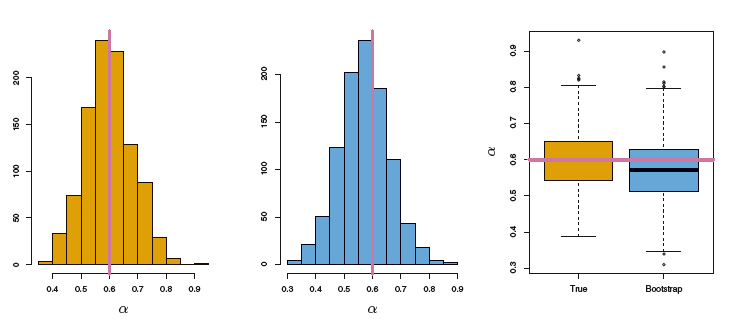

In [ ]:
Image('images/pw45.png', width =800)

Left: A Histogram of the estimates of $\alpha$ obtained by generating 1,000 simulated data sets from the true population.

Center: A histogram of the estimates of $\alpha$ obtained from 1,000 bootstrap samples from a single data set.

Right: The estimates of $\alpha$ displayed in the left and center panels are shown as boxplots.

In each panel, the pink line indicates the true value of α.

左图：通过从真实总体生成 1,000 个模拟数据集获得的 $\alpha$ 估计值的直方图。

中图：通过从单个数据集的 1,000 个引导样本获得的 $\alpha$ 估计值的直方图。

右图：左侧和中间面板中显示的 $\alpha$ 估计值以箱线图显示。

在每个面板中，粉红线表示 α 的真实值。

#### Example
The bootstrap approach can be used to assess the variability of the coefficient
estimates and predictions from a statistical learning method.

Here we use the bootstrap approach in order to assess the variability of the
estimates for $\beta_0$ and $\beta_1$, the intercept and slope terms for the linear regression
model that uses horsepower to predict mpg in the Auto data set.

We will compare the estimates obtained using the bootstrap to those obtained
using the formulas for $SE(\hat{\beta}_0)$ and $SE(\hat{\beta}_1)$ described in Section 3.1.2.


引导方法可用于评估统计学习方法的系数估计和预测的变异性。

在这里，我们使用引导方法来评估 $\beta_0$ 和 $\beta_1$ 估计值的变异性，即使用马力预测 Auto 数据集中的 mpg 的线性回归模型的截距和斜率项。

我们将使用引导获得的估计值与使用第 3.1.2 节中描述的 $SE(\hat{\beta}_0)$ 和 $SE(\hat{\beta}_1)$ 公式获得的估计值进行比较。


In [ ]:
from sklearn.utils import resample

auto_df = pd.read_csv('data/auto.csv')

auto_df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
lm = skl_lm.LinearRegression()
X = auto_df['horsepower'].values.reshape(-1,1)
y = auto_df['mpg']
clf = lm.fit(X,y)
print(clf.coef_, clf.intercept_)

[-0.15784473] 39.93586102117047


In [ ]:
from sklearn.metrics import mean_squared_error

Xsamp, ysamp = resample(X, y, n_samples=1000)
clf = lm.fit(Xsamp,ysamp)
print('Intercept: ' + str(clf.intercept_) + " Coef: " + str(clf.coef_))

Intercept: 39.64146304207546 Coef: [-0.15575979]


# Exercise 5

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
default = pd.read_csv('data/default.csv')
default['student_yes'] = (default['student'] == 'Yes').astype('int')
default['default_yes'] = (default['default'] == 'Yes').astype('int')

In [ ]:
default.head()

In [ ]:
X = default[['balance', 'income']]
y = default['default_yes']

# No Validation set

### Sklearn

In [ ]:
# Notice how tol must be changed to less than default value or convergence won't happen
# Use a high value of C to remove regularization
# 注意必须将 tol 更改为小于默认值，否则不会发生收敛
# 使用较高的 C 值来消除正则化
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X, y)
model.intercept_, model.coef_

### Statsmodels 统计模型
Coefficients are similar 系数相似

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
result = smf.logit(formula='default_yes ~ balance + income', data=default).fit()

In [ ]:
result.summary()

### Error without validation set 没有验证集的错误
This is an in-sample prediction. Training error in both sklearn and statsmodels. Both are equivalent

这是样本内预测。sklearn 和 statsmodels 中的训练误差。两者等效

In [ ]:
(model.predict(X) == y).mean()

In [ ]:
((result.predict(X) > .5) * 1 == y).mean()

## With validation set 使用验证集

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X_train, y_train)
model.intercept_, model.coef_

In [ ]:
X_train_sm = X_train.join(y_train)

In [ ]:
result = smf.logit(formula='default_yes ~ balance + income', data=X_train_sm).fit()
result.summary()

In [ ]:
# Nearly the same as training set. So not too much over fitting has happened
# 与训练集几乎相同。因此没有发生太多过度拟合
(model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean()

Validation error of only .0272

In [ ]:
# c) repeat for 3 different validation sets 对 3 个不同的验证集重复上述步骤
model = LogisticRegression(C=100000, tol=.0000001)

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)

    X_train_sm = X_train.join(y_train)
    result = smf.logit(formula='default_yes ~ balance + income', data=X_train_sm).fit()
    print((model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean())

In [ ]:
# d) include student in model 将学生纳入模型
X = default[['balance', 'income', 'student_yes']]
y = default['default_yes']

model = LogisticRegression(C=100000, tol=.0000001)

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)

    X_train_sm = X_train.join(y_train)
    result = smf.logit(formula='default_yes ~ balance + income + student_yes', data=X_train_sm).fit()
    print((model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean())

Looks like error rate is very similar  看起来错误率非常相似

## Exercise 6
Computing stand errors of coefficents of logistic regression using bootstrap

使用引导法计算逻辑回归系数的标准误差

In [ ]:
result = smf.logit(formula='default_yes ~ balance + income', data=default).fit()
result.summary()

In [ ]:
df_params = pd.DataFrame(columns=['Intercept', 'balance', 'income'])
for i in range(100):
    default_sample = default.sample(len(default), replace=True)
    result_sample = smf.logit(formula='default_yes ~ balance + income', data=default_sample).fit(disp=0)
    df_params = df_params.append(result_sample.params, ignore_index=True)

In [ ]:
# bootstrap parameters and standard error 引导参数和标准误差
df_params.mean(), df_params.std()

In [ ]:
# model parameters and standard error 模型参数和标准误差
result.params, result.bse

Standard errors are a wee bit higher in bootstrap

在 bootstrap 中，标准错误率稍微高一点

# 7
a) Fit Logistic Regression with Lag1, Lag2 使用 Lag1、Lag2 拟合逻辑回归

In [ ]:
weekly = pd.read_csv('data/weekly.csv')

In [ ]:
weekly['Direction_Up'] = (weekly['Direction'] == 'Up').astype(int)

In [ ]:
weekly.head()

In [ ]:
X = weekly[['Lag1', 'Lag2']]
y = weekly['Direction_Up']

In [ ]:
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X, y)

In [ ]:
model.intercept_, model.coef_

In [ ]:
# accuracy
(model.predict(X) == y).mean()

### b) Fit without first observation 无需先进行观察即可进行拟合

In [ ]:
# model is different but nearly identical 模型不同但几乎相同
model.fit(X.iloc[1:], y.iloc[1:])
model.intercept_, model.coef_, (model.predict(X) == y).mean()

In [ ]:
# c
# wrong prediction 错误预测
model.predict([X.iloc[0]]), y[0]

In [ ]:
# d
errors = np.zeros(len(X))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    model.fit(X[leave_out], y[leave_out])
    if model.predict([X.iloc[i]]) != y[i]:
        errors[i] = 1

In [ ]:
# e
errors.mean()

# 8

In [ ]:
np.random.seed(1)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

In [ ]:
y.shape

In [ ]:
plt.scatter(x, y);

In [ ]:
df = pd.DataFrame(np.array([np.ones(len(x)), x, x ** 2, x ** 3, x ** 4, y]).T, columns=['b0', 'x', 'x2', 'x3', 'x4', 'y'])
df.head()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.iloc[:, :5]
y = df['y']
model = LinearRegression()
errors = np.zeros((len(X), 4))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    for j in range(4):
        model.fit(X.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([X.iloc[i, :j+2]]) - y[i]) ** 2

In [ ]:
# each error here is average error for linear, quadratic, cubic and quartic model.
# Looks like it stabilizes at quadratic.
# 这里的每个误差都是线性、二次、三次和四次模型的平均误差。
# 看起来它在二次方上稳定下来。
errors.mean(axis=0)

In [ ]:
# again with different seed. 再次使用不同的种子。
np.random.seed(2)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e
df = pd.DataFrame(np.array([np.ones(len(x)), x, x ** 2, x ** 3, x ** 4, y]).T, columns=['b0', 'x', 'x2', 'x3', 'x4', 'y'])


X = df.iloc[:, :5]
y = df['y']
model = LinearRegression()
errors = np.zeros((len(X), 4))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    for j in range(4):
        model.fit(X.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([X.iloc[i, :j+2]]) - y[i]) ** 2

# quite a different average error. But again stabilizes at quadratic which makes sense
# 平均误差完全不同。但再次稳定在二次方，这是有道理的
errors.mean(axis=0)

### f
since the error doesn't improve after quadratic it's likely the
standard errors for x3 and x4 would not be significant

由于误差在二次之后没有改善，因此 x3 和 x4 的标准误差可能不显著

# 9

In [ ]:
boston = pd.read_csv('data/boston.csv')
boston.head()

In [ ]:
#a
boston['medv'].mean()

In [ ]:
#b
# standard deviation of mean 平均值的标准差
boston['medv'].std() / np.sqrt(len(boston))

In [ ]:
#c
#bootstrap standard deviation of mean 均值的自举标准差
means = [boston['medv'].sample(n = len(boston), replace=True).mean() for i in range(1000)]
np.std(means)

In [ ]:
#d
se = np.std(means)
boston['medv'].mean() - 2 * se, boston['medv'].mean() + 2 * se

http://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

In [ ]:
import scipy.stats as st

In [ ]:
st.t.interval(0.95, len(boston['medv'])-1, loc=np.mean(boston['medv']), scale=st.sem(boston['medv']))

In [ ]:
#e
boston['medv'].median()

In [ ]:
#f
medians = [boston['medv'].sample(n = len(boston), replace=True).median() for i in range(1000)]
np.std(medians)

In [ ]:
#g
boston['medv'].quantile(.1)

In [ ]:
#h
quantile_10 = [boston['medv'].sample(n = len(boston), replace=True).quantile(.1) for i in range(1000)]
np.std(quantile_10)